# Regression

## Laden data


In [39]:
import pandas as pd

df = pd.read_csv('./data/regression/train.csv')
df[['SalePrice', 'GrLivArea']].head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


## Verkennende analyse


In [3]:
import plotly.express as px
import seaborn as sns

corr = df.select_dtypes('number').corr()

fig = px.imshow(corr)
fig.update_layout(
    yaxis={"tickfont": {"size": 5}},
    xaxis={"tickfont": {"size": 5}})

fig.show()

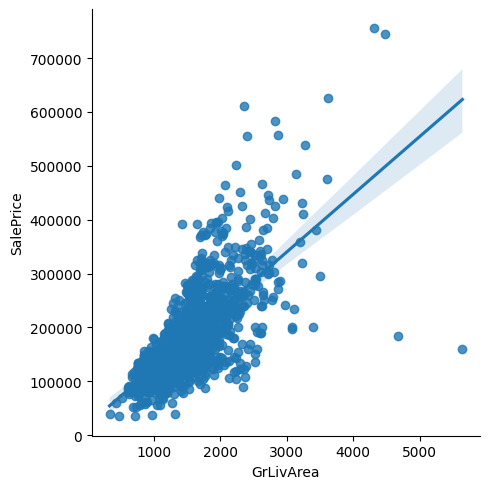

In [4]:
sns.lmplot(df, x="GrLivArea", y="SalePrice")

## Trainen regressiemodellen


In [5]:
import statsmodels.api as sm

In [6]:
# Ordinary Least Squares regression
reg = sm.OLS(df.SalePrice, sm.add_constant(df.GrLivArea)).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.52e-223
Time:                        12:21:48   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [36]:
y = np.array(df.SalePrice)
X = np.array(df.GrLivArea).reshape(-1, 1)

reg = LinearRegression().fit(X, y)

print(f"De regressiescore van dit model is: {reg.score(X,y)}")
print(f"De vergelijking wordt: Y =  {reg.coef_[0]}X + {reg.intercept_}")
print("met Y = SalePrice en X = GrLivArea")

De regressiescore van dit model is: 0.5021486502718042
De vergelijking wordt: Y =  107.1303589658252X + 18569.02585648722
met Y = SalePrice en X = GrLivArea


In [45]:
# Prediction with user input
reg.predict([[1400], [1800]])

array([168551.52840864, 211403.67199497])

### KNeighbours tested on same data as trained (overfitted)

KNeirestNeighbours is een simpel algoritme dat vaak gebruikt wordt om classificatieproblemen op te lossen. Het werkt door het bereken van afstanden van het te voorspellen punt tot andere punten.
In de praktijk kan dit bijvoorbeeld gebruikt worden om te voorspellen welke soort een bloem is op basis van de lengte van de bladeren en de dikte van de stam.
Voor regressieproblemen zal het midden van de matchende punten gebruikt worden als voorspelling.
Het voordeel van KNearestNeighbours is dat het een relatief simpel algoritme is en dat het snel te trainen valt, het nadeel is dat het niet erg slim is en niet in alle situaties goed werkt.


In [19]:
# Defineer x parameters
x_params = ['GrLivArea', 'OverallQual', 'KitchenAbvGr']

# Defineer data als numpy arrays, dit kan gebruikt worden voor het trainen van het model
y = np.array(df.SalePrice)
X = np.array(df[x_params])

# Train het model met de eerder gedefineerde data
reg = KNeighborsRegressor(weights="distance").fit(X, y)

print(f"De regressiescore van dit model is: {reg.score(X,y)}")
print(f"met Y = SalePrice en de X parameters: {x_params}")

De regressiescore van dit model is: 0.9816175256270805
met Y = SalePrice en de X parameters: ['GrLivArea', 'OverallQual', 'KitchenAbvGr']


### KNeighbours train/test split, prove of overfitting


In [35]:
x_params = ['GrLivArea', 'OverallQual', 'KitchenAbvGr']

y = np.array(df.SalePrice)
X = np.array(df[x_params])

# Split de data in een training en een test dataset zodat later de nauwkeurigheid van het model getest kan worden
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

reg = KNeighborsRegressor(weights="distance").fit(X_train, y_train)

print(f"De regressiescore van dit model is: {reg.score(X_test,y_test)}")
print(f"met Y = SalePrice en de X parameters: {x_params}")

De regressiescore van dit model is: 0.5075977757034607
met Y = SalePrice en de X parameters: ['GrLivArea', 'OverallQual', 'KitchenAbvGr']


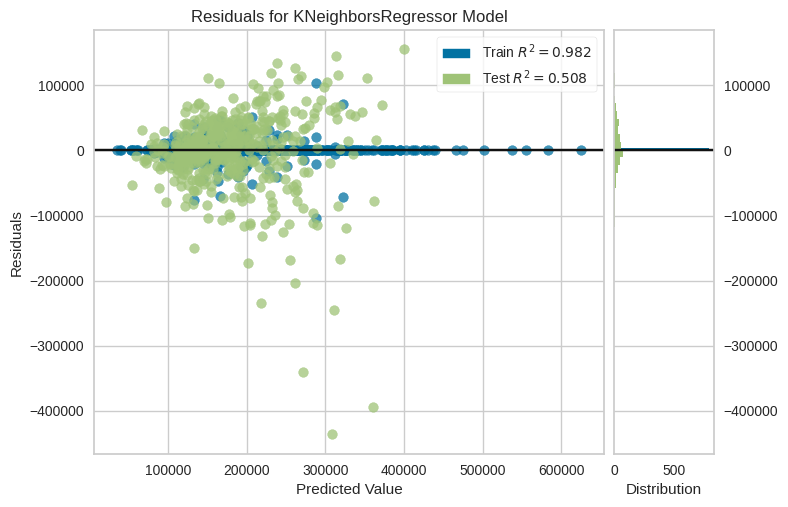

<Axes: title={'center': 'Residuals for KNeighborsRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [32]:
from yellowbrick.regressor import ResidualsPlot

x_params = ['GrLivArea', 'OverallQual', 'KitchenAbvGr']

y = np.array(df.SalePrice)
X = np.array(df[x_params])

# Split de data in een training en een test dataset zodat later de nauwkeurigheid van het model getest kan worden
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

model = KNeighborsRegressor(weights="distance")
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()